<a href="https://www.kaggle.com/code/zainhana/customer-segmentation-with-kkn-method-final-resul?scriptVersionId=94806557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [425]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/train.csv
/kaggle/input/customer-segmentation/test.csv


In [426]:
train = pd.read_csv("../input/customer-segmentation/train.csv")
test = pd.read_csv("../input/customer-segmentation/test.csv")

In [427]:
print("shape of train data {}\n".format(train.shape))

print("shape of test data {}\n".format(test.shape))

shape of train data (8068, 11)

shape of test data (2627, 10)



In [428]:
df_train = [x for x in train if x not in test]
print("Column in train data but not in test data {}\n".format(df_train))

df_test = [x for x in test if x not in train]
print("Column in test data but not in train data {}\n".format(df_test))

Column in train data but not in test data ['Segmentation']

Column in test data but not in train data []



In [429]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [430]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [431]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [432]:
missing_train = train.isna().sum()
percentage_missing_train = train.isna().mean().round(4)*100
data = {'Missing Values' : missing_train,
        'percentage missing values' : percentage_missing_train
       }
# data2 = data.sort_values(by='Missing Values')
data2 = pd.DataFrame(data)
data3 = data2.sort_values(by='Missing Values',ascending=False)
data3

,Missing Values,percentage missing values
Work_Experience,829,10.28
Family_Size,335,4.15
Ever_Married,140,1.74
Profession,124,1.54
Graduated,78,0.97
Var_1,76,0.94
ID,0,0.00
Gender,0,0.00
Age,0,0.00
Spending_Score,0,0.00


In [433]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


<AxesSubplot:>

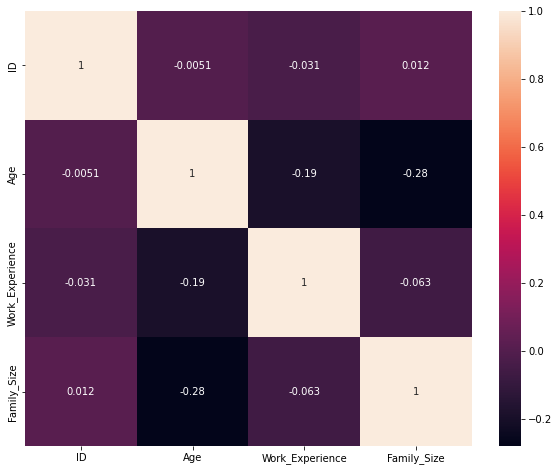

In [434]:
corrmat = train.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, yticklabels=True, square= False, annot=True)

#change segmentation to numeric

In [435]:
train['Segmentation'].value_counts().sort_values(ascending=False)

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [436]:
# train['Segmentation'] = train['Segmentation'].map({'A':1,'B':2,'C':3,'D':4})

In [437]:
# train['Segmentation']

<AxesSubplot:title={'center':'Segmentation Count'}, xlabel='Segmentation', ylabel='count'>

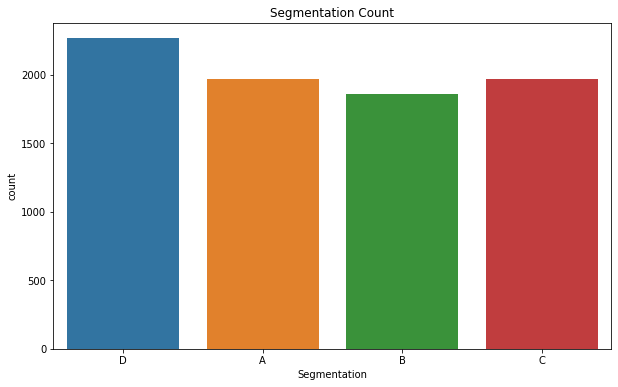

In [438]:
plt.figure(figsize=(10,6))
plt.title('Segmentation Count')
sns.countplot(x=train.Segmentation)
# sns.countplot(train['Segmentation'].value_counts().sort_values(ascending=False))

In [439]:
import plotly.express as px
fig = px.pie(train, names = "Segmentation",
             title = "<b>Counts in Segmentation</b>",
             hole = 0.5,             
            color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [440]:
#save ID from test
test_id = test['ID'].tolist()

#drop ID from test & train
test.drop(['ID'],axis = 1, inplace = True)
train.drop(['ID'],axis = 1, inplace = True)

#save segmen from train
target = train['Segmentation'].values


print(target)

['D' 'A' 'B' ... 'D' 'B' 'B']


In [441]:
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
train['Segmentation'] = train['Segmentation'].replace(data_dict)


In [442]:
cols = train.columns
print (cols)

train_new = train[cols]
corr = train_new.corr()
print(corr["Segmentation"])

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
Age               -0.109461
Work_Experience   -0.000549
Family_Size        0.069992
Segmentation       1.000000
Name: Segmentation, dtype: float64


In [443]:
train["Segmentation"] .value_counts()

8066    2268
8061    1972
8062    1970
8068    1858
Name: Segmentation, dtype: int64

In [444]:
#drop segmen from train
# train.drop(['Segmentation'], axis = 1, inplace = True)

# Combine train and test

In [445]:
data0 = pd.concat((train,test), ignore_index=True)
data0.shape

(10695, 10)

<AxesSubplot:>

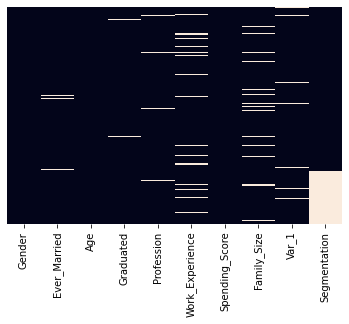

In [446]:
sns.heatmap(data0.isna(),yticklabels = False, cbar = False)

In [447]:
missing_train = data0.isna().sum()
percentage_missing_train = data0.isna().mean().round(4)*100
data = {'Missing Values' : missing_train,
        'percentage missing values' : percentage_missing_train
       }
# data2 = data.sort_values(by='Missing Values')
data2 = pd.DataFrame(data)
data3 = data2.sort_values(by='Missing Values',ascending=False)
dfStyler = data3.style.set_properties(**{'text-align': 'center'})
dfStyler

,Missing Values,percentage missing values
Segmentation,2627,24.560000
Work_Experience,1098,10.270000
Family_Size,448,4.190000
Ever_Married,190,1.780000
Profession,162,1.510000
Var_1,108,1.010000
Graduated,102,0.950000
Gender,0,0.000000
Age,0,0.000000
Spending_Score,0,0.000000


In [448]:
def missing_values(df, ascending):
    missing = df.isna().sum().sort_values(ascending = False)
    missing = missing[df.isna().sum().sort_values(ascending = False) != 0]
    
    percentage = (df.isna().sum().sort_values(ascending = False)/len(df)*100)[(df.isna().sum().sort_values(ascending = False)/len(df)*100) != 0]
    return pd.concat([missing, percentage], axis =1, keys=['missing','percentage'])

def miss_plot(df):
    fig,ax = plt.subplots(figsize =(12,9))
    sns.barplot(data = df, x=df.index, y = 'percentage', palette = 'winter')
    plt.axhline(y = len(df)/4, color = 'red', linewidth = 1.5)
    plt.xticks(rotation=90)
    plt.show()

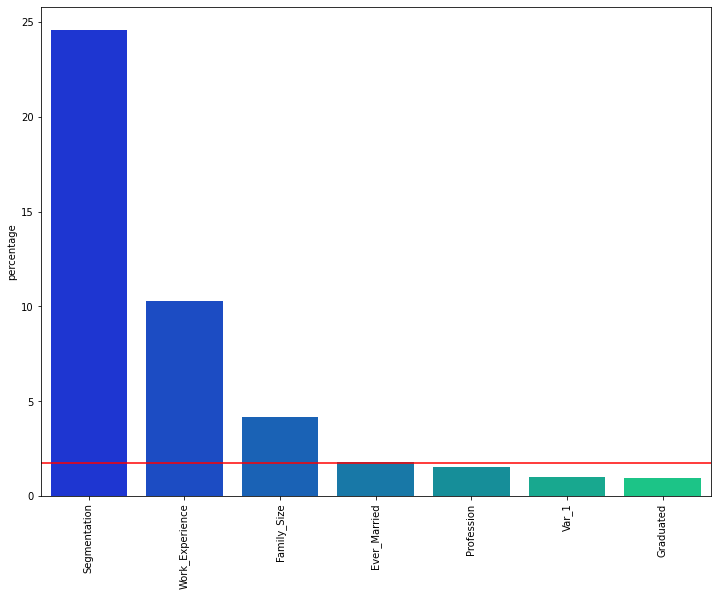

In [449]:
missing = missing_values(data0, False)
miss_plot(missing)

# Data Visualization

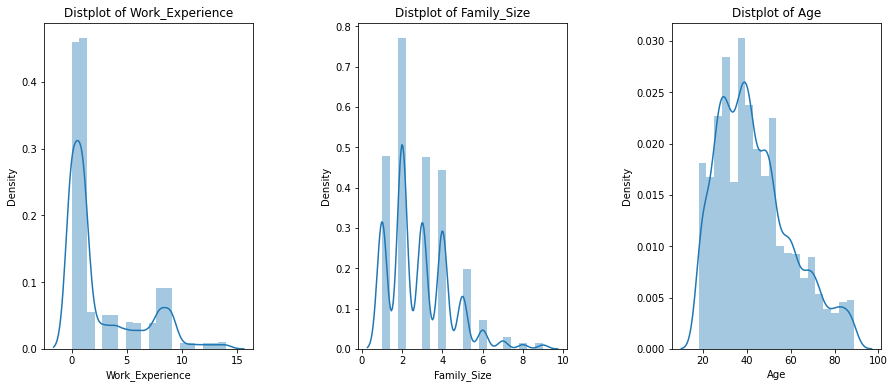

In [450]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Work_Experience','Family_Size','Age']:
    n += 1
    plt.subplot(1 , 3, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data0[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<AxesSubplot:>

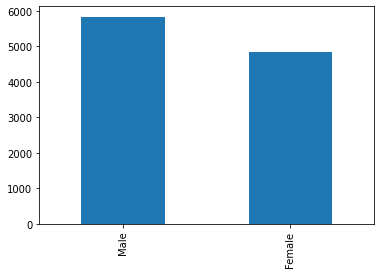

In [451]:
data0['Gender'].value_counts().plot(kind='bar')

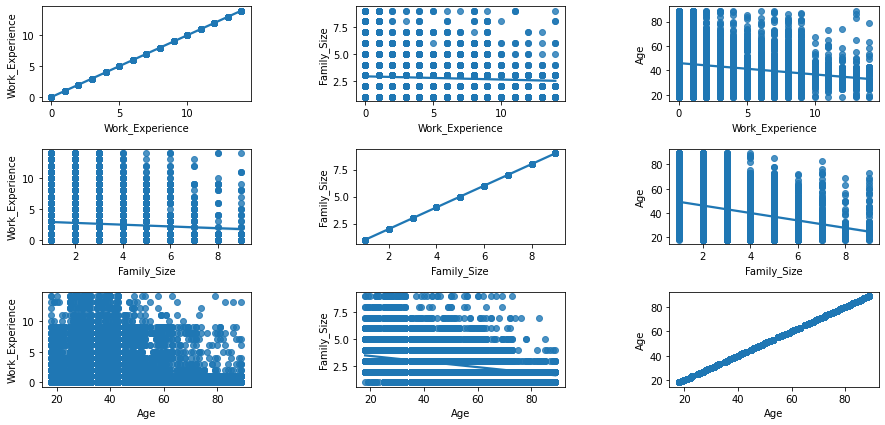

In [452]:

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Work_Experience','Family_Size','Age']:
    for y in ['Work_Experience','Family_Size','Age']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data0)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

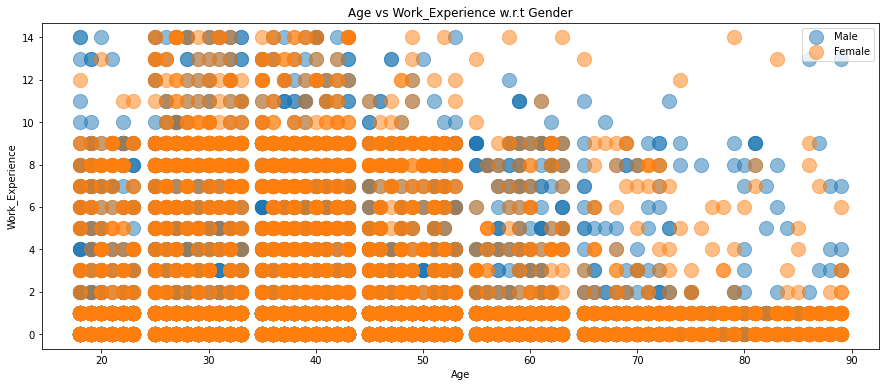

In [453]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Work_Experience' , data = data0[data0['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Work_Experience') 
plt.title('Age vs Work_Experience w.r.t Gender')
plt.legend()
plt.show()

In [454]:
import plotly.express as px
fig = px.pie(data0, names = "Gender",
             title = "<b>Counts in Gender</b>",
             hole = 0.5,             
            color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

<AxesSubplot:>

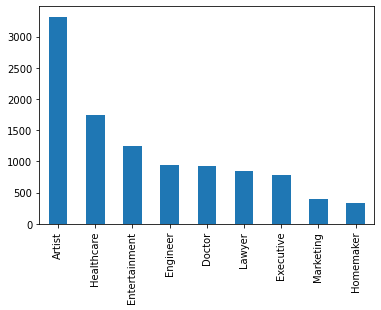

In [455]:
data0.Profession.value_counts().sort_values(ascending=False).plot(kind='bar')

# Cleaning data

Handling Missing Values¶


Numerical features : modus


Categorical features : replace None


Var_1: delete

In [456]:
type = data0.dtypes[['Work_Experience','Family_Size','Ever_Married','Profession','Var_1','Graduated']]
type

Work_Experience    float64
Family_Size        float64
Ever_Married        object
Profession          object
Var_1               object
Graduated           object
dtype: object

In [457]:
data0['Work_Experience'].value_counts()

1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
10.0      64
11.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [458]:
data0['Family_Size'].value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [459]:
data0[data0['Work_Experience'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,8061.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,8061.0
13,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,8061.0
39,Male,Yes,56,Yes,Artist,NaN,Average,2.0,Cat_6,8062.0
45,Female,Yes,79,No,Lawyer,NaN,High,2.0,Cat_6,8061.0
...,...,...,...,...,...,...,...,...,...,...
10615,Female,Yes,35,Yes,Artist,NaN,Average,4.0,Cat_6,NaN
10640,Female,No,23,No,NaN,NaN,Low,2.0,Cat_6,NaN
10656,Female,No,29,No,Artist,NaN,Low,4.0,Cat_4,NaN
10661,Female,Yes,51,Yes,Artist,NaN,High,4.0,Cat_6,NaN


In [460]:
#drop var_1 column
data0.drop(['Var_1'],axis=1, inplace = True)
data0.shape

(10695, 9)

In [461]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf_numerics = data0.select_dtypes(include=numerics)

for x in newdf_numerics:
    data0[x].replace([np.nan],data0[x].mode()[0],inplace=True)

In [462]:
newdf_numerics.isna().sum()

Age                   0
Work_Experience    1098
Family_Size         448
Segmentation       2627
dtype: int64

In [463]:
object = ['object']
newdf_object = data0.select_dtypes(include=object)
newdf_object.isna().sum().sort_values(ascending=False)

# for x in newdf_object :
#     data0[x].replace([np.nan],'None',inplace=True)

Ever_Married      190
Profession        162
Graduated         102
Gender              0
Spending_Score      0
dtype: int64

In [464]:
for x in newdf_object :
    data0[x].replace([np.nan],'None',inplace=True)

In [465]:
data0.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [466]:
data0.Profession.value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
None              162
Name: Profession, dtype: int64

In [467]:
data0.Spending_Score.value_counts()

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

In [468]:
cat_object = {
    'Spending_Score': {'Low' : 1,'Average':2,'High':3},
}

data0.replace(cat_object, inplace = True)

In [469]:
data0.Spending_Score.value_counts()

1    6494
2    2599
3    1602
Name: Spending_Score, dtype: int64

In [470]:
from sklearn.preprocessing import LabelEncoder

mapping = LabelEncoder()
data0['Gender'] = mapping.fit_transform(data0['Gender'])
data0['Ever_Married'] = mapping.fit_transform(data0['Ever_Married'])
data0['Graduated'] = mapping.fit_transform(data0['Graduated'] )
data0['Profession'] = mapping.fit_transform(data0['Profession'])
data0[['Gender','Ever_Married','Graduated','Profession']].head()

,Gender,Ever_Married,Graduated,Profession
0,1,0,0,5
1,0,2,2,2
2,0,2,2,2
3,1,2,2,7
4,0,2,2,3


In [471]:
data0.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,5,1.0,1,4.0,8066.0
1,0,2,38,2,2,1.0,2,3.0,8061.0
2,0,2,67,2,2,1.0,1,1.0,8068.0
3,1,2,67,2,7,0.0,3,2.0,8068.0
4,0,2,40,2,3,1.0,3,6.0,8061.0


In [472]:
data0.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

<AxesSubplot:>

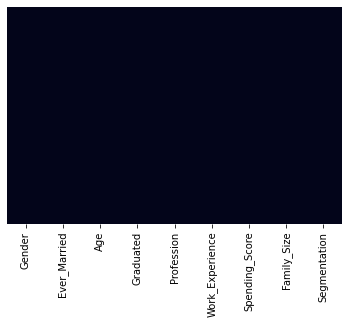

In [473]:
sns.heatmap(data0.isna(),yticklabels = False, cbar=False)

**As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers**


* D correspond to 3
* A orrespond to 0
* C correspond to 2
* B correspond to 1

In [474]:
# target_before = pd.DataFrame(target, columns=['target'])
# target_before.value_counts()

In [475]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder

# # creating initial dataframe
# target_df = pd.DataFrame(target, columns=['target'])

# # creating instance of labelencoder
# labelencoder = LabelEncoder()

# # Assigning numerical values and storing in another column
# target_df['target'] = labelencoder.fit_transform(target_df['target'])
# target_df.value_counts()

# Min Max Scaler

In [476]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1 = pd.DataFrame(scaler.fit_transform(data0), columns = data0.columns)
data1.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,0.056338,0.0,0.555556,0.071429,0.0,0.375,0.714286
1,0.0,1.0,0.281690,1.0,0.222222,0.071429,0.5,0.250,0.000000
2,0.0,1.0,0.690141,1.0,0.222222,0.071429,0.0,0.000,1.000000
3,1.0,1.0,0.690141,1.0,0.777778,0.000000,1.0,0.125,1.000000
4,0.0,1.0,0.309859,1.0,0.333333,0.071429,1.0,0.625,0.000000


In [477]:
#knowing max and min scala

scala = scaler.fit_transform(data0)
min(scala[0]), max(scala[0]) 

(0.0, 1.0)

**as we can see, now the have all value in rang 0-1**

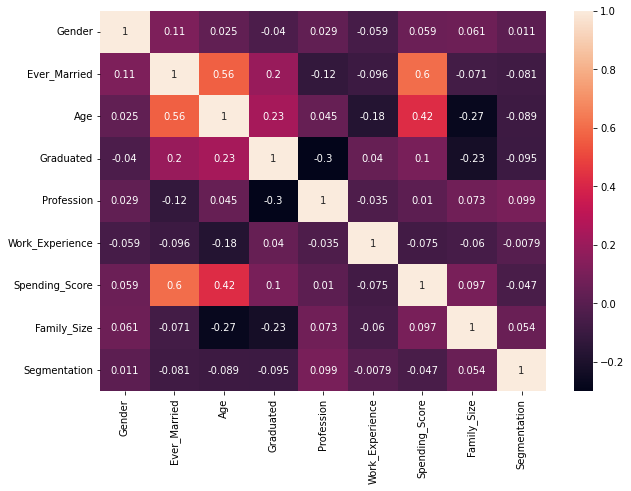

In [478]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(data1.corr(), annot=True, ax=ax)
plt.show()

In [479]:
data1.shape

(10695, 9)

# split train test data

In [480]:
train_final = data1.loc[:train.index.max(), :].copy()
test_final = data1.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [481]:
print('train final {} \n'.format(train_final.shape))
print('test final {}'.format(test_final.shape))

train final (8068, 9) 

test final (2627, 9)


In [482]:
train_final.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,0.056338,0.0,0.555556,0.071429,0.0,0.375,0.714286
1,0.0,1.0,0.281690,1.0,0.222222,0.071429,0.5,0.250,0.000000
2,0.0,1.0,0.690141,1.0,0.222222,0.071429,0.0,0.000,1.000000
3,1.0,1.0,0.690141,1.0,0.777778,0.000000,1.0,0.125,1.000000
4,0.0,1.0,0.309859,1.0,0.333333,0.071429,1.0,0.625,0.000000


In [483]:
test_final.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,1.0,0.253521,1.0,0.222222,0.000000,0.0,0.000,0.714286
1,1.0,1.0,0.267606,1.0,0.555556,0.571429,0.5,0.375,0.714286
2,0.0,1.0,0.718310,0.0,1.000000,0.000000,0.0,0.000,0.714286
3,1.0,1.0,0.577465,0.0,0.444444,0.785714,1.0,0.125,0.714286
4,0.0,0.0,0.014085,0.0,0.888889,0.071429,0.0,0.375,0.714286


In [484]:
# from sklearn.model_selection import train_test_split
# # X = data0.drop(columns=['ID','Segmentation'])
# # y = data0.Segmentation
# X_train,X_test,y_train,y_test = train_test_split(train_final,target,test_size=0.25,random_state=0)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

# USING KNN METHOD

In [485]:
#Let's use knn algorithm on numeric columns

X_train = train_final
y_train = train['Segmentation']
X_test = test_final

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [486]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,1.0,0.253521,1.0,0.222222,0.000000,0.0,0.000,0.714286
1,1.0,1.0,0.267606,1.0,0.555556,0.571429,0.5,0.375,0.714286
2,0.0,1.0,0.718310,0.0,1.000000,0.000000,0.0,0.000,0.714286
3,1.0,1.0,0.577465,0.0,0.444444,0.785714,1.0,0.125,0.714286
4,0.0,0.0,0.014085,0.0,0.888889,0.071429,0.0,0.375,0.714286


In [487]:
X_test.dtypes

Gender             float64
Ever_Married       float64
Age                float64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation       float64
dtype: object

In [488]:
test_final.dtypes

Gender             float64
Ever_Married       float64
Age                float64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation       float64
dtype: object

In [489]:
test_final.shape, X_test.shape

((2627, 9), (2627, 9))

# CHANGE OBJECT TO NUMBER

In [490]:
from collections import OrderedDict
data_dict_new = OrderedDict(sorted(data_dict.items()))
print(data_dict_new)

OrderedDict([('A', 8061), ('B', 8068), ('C', 8062), ('D', 8066)])


# MAKE CSV FILE

In [491]:

#print(type(predictions) for result like get dummies)
result_dataframe = pd.DataFrame({
    "Id": test_id,

})
for key,value in data_dict_new.items():
    result_dataframe[key] = 0
count = 0
for item in predictions:
    for key,value in data_dict.items():
        if(value == item):
            result_dataframe[key][count] = 1
    count+=1
result_dataframe.to_csv("submission_knn.csv", index=False) 
result_dataframe.head()

,Id,A,B,C,D
0,458989,0,0,0,1
1,458994,0,0,0,1
2,458996,0,0,0,1
3,459000,0,0,0,1
4,459001,0,0,0,1


In [538]:
id_result = result_dataframe['Id'].tolist()
# result_dataframe.index = 1
# result_dataframe.index += 1

no = np.arange(1, len(id) + 1)
id = pd.DataFrame({
#     'No' : result_dataframe.index,
    'no' : no,
    'Id' : id_result
})

id

,no,Id
0,1,458989
1,2,458994
2,3,458996
3,4,459000
4,5,459001
...,...,...
2622,2623,467954
2623,2624,467958
2624,2625,467960
2625,2626,467961


In [539]:

result_dataframe2 = result_dataframe.drop(['Id'],axis=1)
s2 = result_dataframe2.idxmax(axis=1)
no = np.arange(1, len(s2)+1)
segmen = pd.DataFrame({
   'no' : no,
    'Segmentasi' : s2
})
# segmen.index = np.arange(0,len(s2)+1)
segmen


,no,Segmentasi
1,1,D
2,2,D
3,3,D
4,4,D
5,5,D
...,...,...
2623,2623,D
2624,2624,D
2625,2625,D
2626,2626,D


In [544]:
result_final = pd.merge(id,segmen,on='no')

,no,Id,Segmentasi
0,1,458989,D
1,2,458994,D
2,3,458996,D
3,4,459000,D
4,5,459001,D
5,6,459003,B
6,7,459005,D
7,8,459008,B
8,9,459013,D
9,10,459014,D


# GET FINAL RESULT IN CSV

In [546]:
result_final.drop(['no'],axis=1,inplace=True)
result_final.to_csv("submission_kkn_final.csv",index=False)
result_final.head(10)

,Id,Segmentasi
0,458989,D
1,458994,D
2,458996,D
3,459000,D
4,459001,D
5,459003,B
6,459005,D
7,459008,B
8,459013,D
9,459014,D
